In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('compas-scores-two-years.csv')
df.shape

(7214, 53)

In [10]:
df.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,6907.000000,7192.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,5501.255753,34.817993,0.067230,4.509565,0.090934,0.109371,3.472415,3.304763,57.731368,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,3.472415,11.465068,553.436651,0.382867,0.450652
std,3175.706870,11.888922,0.473972,2.856396,0.485239,0.501586,4.882538,75.809505,329.740215,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,4.882538,46.954563,399.020583,0.486120,0.497593
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-414.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2735.250000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,148.250000,0.000000,0.000000
50%,5509.500000,31.000000,0.000000,4.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,2.000000,0.000000,530.500000,0.000000,0.000000
75%,8246.500000,42.000000,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,5.000000,1.000000,914.000000,1.000000,1.000000
max,11001.000000,96.000000,20.000000,10.000000,13.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,937.000000,1186.000000,1.000000,1.000000


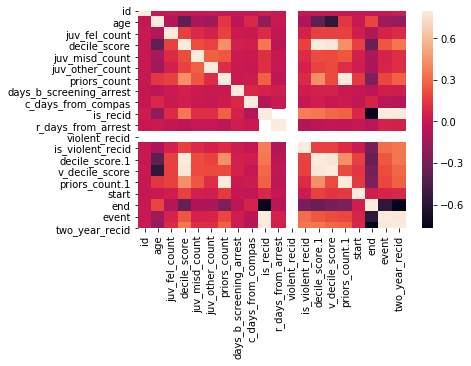

In [11]:
import seaborn as sns

corrmat = df.corr()
fig = plt.figure()

sns.heatmap(corrmat, vmax = 0.8)
plt.show()

In [12]:
dfgb = df.groupby("race")
race_count = df.groupby("race")["name"].count()
dfgb.describe()


id                                                    \
                   count         mean          std    min      25%     50%   
race                                                                         
African-American  3696.0  5524.856872  3164.042069    3.0  2790.75  5517.0   
Asian               32.0  5770.093750  3202.147156  730.0  2655.50  6365.5   
Caucasian         2454.0  5488.236349  3165.242952    8.0  2760.25  5539.0   
Hispanic           637.0  5518.141287  3239.228092   21.0  2589.00  5548.0   
Native American     18.0  4379.388889  3073.921181  696.0  1927.00  3114.5   
Other              377.0  5356.838196  3257.307691    1.0  2475.00  5264.0   

                                       age             ... event       \
                      75%      max   count       mean  ...   75%  max   
race                                                   ...              
African-American  8239.25  11000.0  3696.0  32.740801  ...  1.00  1.0   
Asian             8285.25  10875.0    32.0  37.781250  ...  0.25  1.0   
Caucasian         8204.00  10992.0  2454.0  37.726569  ...  1.00  1.0   
Hispanic          8427.00  11001.0   637.0  35.455259  ...  1.00  1.0   
Native American   6679.25  10468.0    18.0  32.888889  ...  1.00  1.0   
Other             8277.00  10999.0   377.0  35.013263  ...  1.00  1.0   

                 two_year_recid                                               
                          count      mean       std  min  25%  50%  75%  max  
race                                                                          
African-American         3696.0  0.514340  0.499862  0.0  0.0  1.0  1.0  1.0  
Asian                      32.0  0.281250  0.456803  0.0  0.0  0.0  1.0  1.0  
Caucasian                2454.0  0.393643  0.488657  0.0  0.0  0.0  1.0  1.0  
Hispanic                  637.0  0.364207  0.481585  0.0  0.0  0.0  1.0  1.0  
Native American            18.0  0.555556  0.511310  0.0  0.0  1.0  1.0  1.0  
Other                     377.0  0.352785  0.478472  0.0  0.0  0.0  1.0  1.0  

[6 rows x 160 columns]

Text(0.5, 0.98, 'Score Frequency by Race')

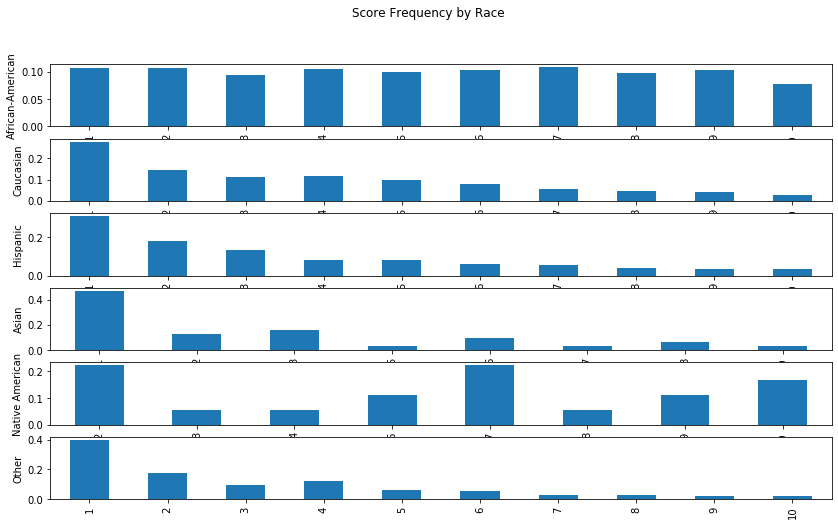

In [13]:
fig, ax = plt.subplots(6, figsize=(14, 8))
for (i, race) in enumerate(["African-American", "Caucasian","Hispanic","Asian","Native American","Other"]):
    (
        (dfgb
            .get_group(race)
            .groupby("decile_score")["name"].count() / race_count[race]
        )
        .plot(kind="bar", ax=ax[i])
    )
    ax[i].set_ylabel(race)
    ax[i].set_xlabel("")
    # set equal y limit for visual comparison
    

fig.suptitle("Score Frequency by Race")

In [14]:
x = df.to_numpy()
print(x)

[[1 'miguel hernandez' 'miguel' ... 327 0 0]
 [3 'kevon dixon' 'kevon' ... 159 1 1]
 [4 'ed philo' 'ed' ... 63 0 1]
 ...
 [10999 'winston gregory' 'winston' ... 808 0 0]
 [11000 'farrah jean' 'farrah' ... 754 0 0]
 [11001 'florencia sanmartin' 'florencia' ... 258 0 1]]


In [15]:
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [16]:
list(df.columns)

['id',
 'name',
 'first',
 'last',
 'compas_screening_date',
 'sex',
 'dob',
 'age',
 'age_cat',
 'race',
 'juv_fel_count',
 'decile_score',
 'juv_misd_count',
 'juv_other_count',
 'priors_count',
 'days_b_screening_arrest',
 'c_jail_in',
 'c_jail_out',
 'c_case_number',
 'c_offense_date',
 'c_arrest_date',
 'c_days_from_compas',
 'c_charge_degree',
 'c_charge_desc',
 'is_recid',
 'r_case_number',
 'r_charge_degree',
 'r_days_from_arrest',
 'r_offense_date',
 'r_charge_desc',
 'r_jail_in',
 'r_jail_out',
 'violent_recid',
 'is_violent_recid',
 'vr_case_number',
 'vr_charge_degree',
 'vr_offense_date',
 'vr_charge_desc',
 'type_of_assessment',
 'decile_score.1',
 'score_text',
 'screening_date',
 'v_type_of_assessment',
 'v_decile_score',
 'v_score_text',
 'v_screening_date',
 'in_custody',
 'out_custody',
 'priors_count.1',
 'start',
 'end',
 'event',
 'two_year_recid']

In [27]:
df.drop(['id','name', 'first','last','compas_screening_date', 'dob', 'age_cat', 'race', 'v_score_text', 'v_screening_date','score_text',], axis=1)

KeyError: "['name' 'first' 'last' 'compas_screening_date' 'dob' 'age_cat' 'race'\n 'v_score_text' 'v_screening_date' 'score_text'] not found in axis"

In [18]:
df.dtypes

id                           int64
name                        object
first                       object
last                        object
compas_screening_date       object
sex                         object
dob                         object
age                          int64
age_cat                     object
race                        object
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
c_jail_in                   object
c_jail_out                  object
c_case_number               object
c_offense_date              object
c_arrest_date               object
c_days_from_compas         float64
c_charge_degree             object
c_charge_desc               object
is_recid                     int64
r_case_number               object
r_charge_degree             object
r_days_from_arrest         float64
r_offense_date      

In [33]:
df=df.drop(['id'], axis=1)

In [34]:
df.dtypes

age                 int64
juv_fel_count       int64
decile_score        int64
juv_misd_count      int64
juv_other_count     int64
priors_count        int64
is_recid            int64
is_violent_recid    int64
decile_score.1      int64
v_decile_score      int64
priors_count.1      int64
start               int64
end                 int64
event               int64
two_year_recid      int64
dtype: object

In [20]:
!pip install networkx

In [36]:
from sklearn.neighbors import kneighbors_graph
df = df.select_dtypes(include =['float64','int64'])
df = df.dropna(axis = 1)
df = df.dropna()
df.dtypes
df.head()

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
0,69,0,1,0,0,0,0,0,1,1,0,0,327,0,0
1,34,0,3,0,0,0,1,1,3,1,0,9,159,1,1
2,24,0,4,0,1,4,1,0,4,3,4,0,63,0,1
3,23,0,8,1,0,1,0,0,8,6,1,0,1174,0,0
4,43,0,1,0,0,2,0,0,1,1,2,0,1102,0,0


In [37]:
x = df.to_numpy()
p = 2 # hyper-parameter imo
Wx = kneighbors_graph(x, 20, mode='distance', include_self=True)
Wx = Wx.A

In [49]:
import math
t = 10
expf = lambda xx: math.exp(-xx/t)
expfunc = np.vectorize(expf)
Wx = expfunc(Wx)

In [50]:
print(Wx)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [51]:
print(x)

[[ 69   0   1 ... 327   0   0]
 [ 34   0   3 ... 159   1   1]
 [ 24   0   4 ...  63   0   1]
 ...
 [ 57   0   1 ... 808   0   0]
 [ 33   0   2 ... 754   0   0]
 [ 23   0   4 ... 258   0   1]]


In [58]:
Wx.shape

(7214, 7214)

In [65]:
Wf=np.zeros((x.shape[0],x.shape[0]))
df2= pd.read_csv('compas-scores-two-years.csv')
df2.shape
totar=df2.to_numpy()
list=[]
for i in range(totar.shape[0]):
    if totar[i][9]=="Caucasian":
        list.append(1)
    else:
        list.append(0)

In [66]:
print(Wf)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [67]:
for i in range(x.shape[0]): #within group info
    for j in range(x.shape[0]):
        if x[i][2]==x[j][2] and list[i]==list[j]:
            Wf[i][j]=1
            Wf[j][i]=1


In [68]:
print(Wf)

[[1. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]


In [78]:
caucscores=[]
noncaucscores=[]
k = 0.75 #kth quartile
for i in range(len(list)):
    if list[i]==1:
        caucscores.append(x[i][2])
for i in range(len(list)):
    if list[i]==0:
        noncaucscores.append(x[i][2])
print(len(caucscores))
print(len(noncaucscores))

2454
4760


In [80]:
caucscores.sort()
noncaucscores.sort()
cauccutoff=caucscores[math.floor(k*(len(caucscores)-1))]
noncauccutoff=noncaucscores[math.floor(k*(len(noncaucscores)-1))]
print(noncauccutoff)
print(cauccutoff)


7
5


In [84]:
for i in range(x.shape[0]): #within group info
    for j in range(x.shape[0]):
        if list[i]!=list[j] and ((x[i][2]<(list[i]==1 if cauccutoff else noncauccutoff)and x[j][2]<(list[j]==1 if cauccutoff else noncauccutoff))or(x[i][2]>(list[i]==1 if cauccutoff else noncauccutoff)and x[j][2]>(list[j]==1 if cauccutoff else noncauccutoff))):
            Wf[i][j]=1
            Wf[j][i]=1

In [85]:
Wf

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])